IoU: 0.9870


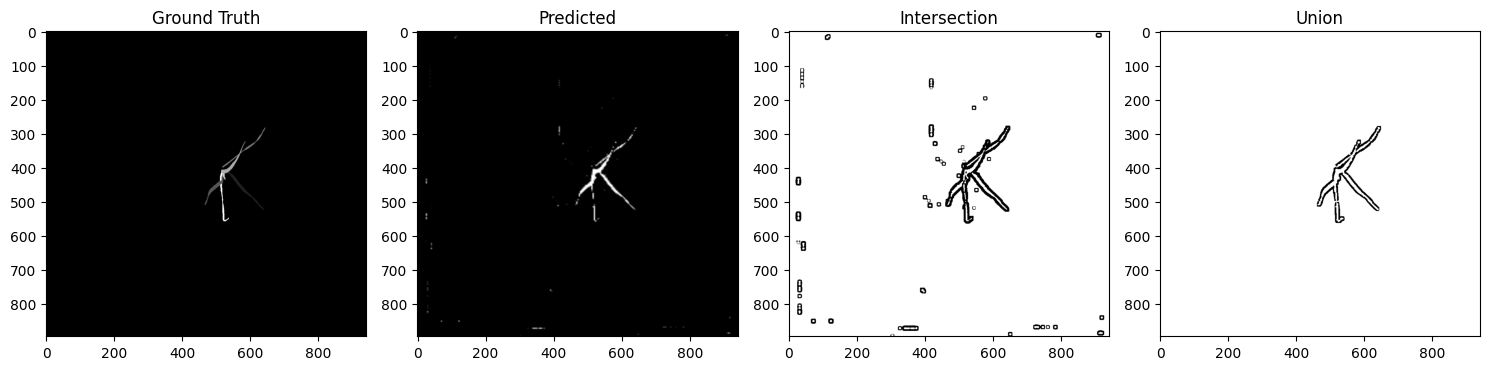

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to load and preprocess images from Kaggle dataset
def load_and_preprocess_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    # Perform any preprocessing steps if needed
    return img

# Define paths to images in Kaggle dataset
image1_path = 'path to the images'  #Adjust this path with actual segmented image path if u want to compare a particular image
image2_path = 'path to the images'  #Adjust this path with model segmented image path if u want to compare a particular image

# Load and preprocess images
img1 = load_and_preprocess_image(image1_path)
img2 = load_and_preprocess_image(image2_path)

# Resize img2 to match img1's dimensions if necessary
if img1.shape != img2.shape:
    img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

# Normalize image intensity (optional step)
img1_norm = cv2.normalize(img1, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
img2_norm = cv2.normalize(img2, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Binarize the images using adaptive thresholding
img1_bin = cv2.adaptiveThreshold(img1_norm, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
img2_bin = cv2.adaptiveThreshold(img2_norm, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Calculate intersection and union
intersection = cv2.bitwise_and(img1_bin, img2_bin)
union = cv2.bitwise_or(img1_bin, img2_bin)

# Calculate IoU
iou = np.sum(intersection) / np.sum(union)

print(f"IoU: {iou:.4f}")

# Visualize results
plt.figure(figsize=(15, 5))

plt.subplot(141)
plt.imshow(img1, cmap='gray')
plt.title('Ground Truth')

plt.subplot(142)
plt.imshow(img2, cmap='gray')
plt.title('Predicted')

plt.subplot(143)
plt.imshow(intersection, cmap='gray')
plt.title('Intersection')

plt.subplot(144)
plt.imshow(union, cmap='gray')
plt.title('Union')

plt.tight_layout()
plt.show()


In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to load and preprocess images from Kaggle dataset
def load_and_preprocess_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    # Perform any preprocessing steps if needed
    return img

# Function to calculate IoU
def calculate_iou(img1, img2):
    # Resize img2 to match img1's dimensions if necessary
    if img1.shape != img2.shape:
        img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

    # Normalize image intensity (optional step)
    img1_norm = cv2.normalize(img1, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    img2_norm = cv2.normalize(img2, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    # Binarize the images using adaptive thresholding
    img1_bin = cv2.adaptiveThreshold(img1_norm, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
    img2_bin = cv2.adaptiveThreshold(img2_norm, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

    # Calculate intersection and union
    intersection = cv2.bitwise_and(img1_bin, img2_bin)
    union = cv2.bitwise_or(img1_bin, img2_bin)

    # Calculate IoU
    iou = np.sum(intersection) / np.sum(union)
    
    return iou, intersection, union

# Define paths to images folder in Kaggle dataset
images_folder = 'path to the images folder'  #Adjust this path with actual segmented images folder path 
segmented_folder = 'path to the images folder' #Adjust this path with model segmented images folder 

# Get list of all image files in the folder
image_files = os.listdir(images_folder)

# Calculate IoU for each pair of images and average IoU
total_iou = 0.0
num_pairs = 0

for filename in image_files:
    if filename.endswith('.png'):
        img1_path = os.path.join(images_folder, filename)
        img2_path = os.path.join(segmented_folder, 'mask_' + filename)

        # Load and preprocess images
        img1 = load_and_preprocess_image(img1_path)
        img2 = load_and_preprocess_image(img2_path)

        # Calculate IoU for the pair
        iou, _, _ = calculate_iou(img1, img2)
        total_iou += iou
        num_pairs += 1

        # Visualize results (optional)
        # Uncomment if you want to visualize each pair's results
        """
        plt.figure(figsize=(15, 5))

        plt.subplot(141)
        plt.imshow(img1, cmap='gray')
        plt.title('Ground Truth')

        plt.subplot(142)
        plt.imshow(img2, cmap='gray')
        plt.title('Predicted')

        plt.subplot(143)
        plt.imshow(intersection, cmap='gray')
        plt.title('Intersection')

        plt.subplot(144)
        plt.imshow(union, cmap='gray')
        plt.title('Union')

        plt.tight_layout()
        plt.show()
        """

# Calculate average IoU
average_iou = total_iou / num_pairs
print(f"Average IoU: {average_iou:.4f}")


Average IoU: 0.9748


In [3]:
import os
import cv2
import numpy as np

# Function to load and preprocess images
def load_and_preprocess_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    return img

# Function to calculate Dice coefficient
def dice_coefficient(img1, img2):
    # Resize img2 to match img1's dimensions if necessary
    if img1.shape != img2.shape:
        img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

    # Binarize the images using adaptive thresholding
    img1_bin = cv2.adaptiveThreshold(img1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
    img2_bin = cv2.adaptiveThreshold(img2, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

    # Calculate intersection and union
    intersection = np.sum(cv2.bitwise_and(img1_bin, img2_bin))
    img1_sum = np.sum(img1_bin)
    img2_sum = np.sum(img2_bin)

    # Calculate Dice coefficient
    dice = (2 * intersection) / (img1_sum + img2_sum)
    
    return dice

# Function to calculate Symmetric Best Dice (SBD)
def calculate_sbd(ground_truth_folder, predicted_folder):
    ground_truth_files = [f for f in os.listdir(ground_truth_folder) if f.endswith('.png')]
    
    total_sbd = 0.0
    num_images = len(ground_truth_files)
    
    for gt_file in ground_truth_files:
        gt_img_path = os.path.join(ground_truth_folder, gt_file)
        pred_img_path = os.path.join(predicted_folder, 'mask_' + gt_file)
        
        gt_img = load_and_preprocess_image(gt_img_path)
        pred_img = load_and_preprocess_image(pred_img_path)
        
        sbd_gt_to_pred = dice_coefficient(gt_img, pred_img)
        sbd_pred_to_gt = dice_coefficient(pred_img, gt_img)
        
        sbd = min(sbd_gt_to_pred, sbd_pred_to_gt)
        total_sbd += sbd
    
    average_sbd = total_sbd / num_images
    return average_sbd

# Define paths to the folders
ground_truth_folder = 'path to the images folder'   #Adjust this path with actual segmented images folder path 
predicted_folder = 'path to the images folder' #Adjust this path with model segmented images folder 

# Calculate and print SBD
average_sbd = calculate_sbd(ground_truth_folder, predicted_folder)
average_sbd


0.9670391315506621